In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
# training svm model on 'temp_training_dataset' csv file
df = pd.read_csv('../output/temp_training_dataset.csv')
df

,Company Name,Similar Name,Target,Simple Ratio,partial Ratio,Token Sort Ratio,Token Set Ratio
0,HARRIS COUNTY CSCD,HARRIS COUNTY,1,84,100,84,100
1,HARRIS COUNTY CSCD,HARRIS COUNTY ITC,1,86,94,74,87
2,RICHLAND COUNTY EMERGENCY SERVICES,LANDER COUNTY EMERGENCY SERVICES,0,91,97,91,91
3,CS RECURSOS GEOTERMICO ICE,CS RECURSOS GEOTAARMICO ICE,1,94,92,94,94
4,HARRIS COUNTY ITC,HARRIS COUNTY,1,90,100,87,100
...,...,...,...,...,...,...,...
423,MITSUI BUSSAN CHEMICALS,MITSUI BUSSAN METALS,0,84,82,84,84
424,SUMITOMO MITSUI DS ASSET MANAGEMENT (HK),SUMITOMO MITSUI DS ASSET MANAGEMENT,1,93,100,96,100
425,MITSUI SUMITOMO INSURANCE (CHINA),MITSUI SUMITOMO INSURANCE (THAILAND BRANCH),0,84,92,78,89
426,MITSUI SUMITOMO INSURANCE,MITSUI SUMITOMO INSURANCE (CHINA),0,86,100,89,100


In [3]:
# confirming the dimensions of the dataset
print(df.shape)

(428, 7)


In [4]:
# Let’s also look at the data types of each attribute
print(df.dtypes)

Company Name        object
Similar Name        object
Target               int64
Simple Ratio         int64
partial Ratio        int64
Token Sort Ratio     int64
Token Set Ratio      int64
dtype: object


In [5]:
print(df.describe())

           Target  Simple Ratio  partial Ratio  Token Sort Ratio  \
count  428.000000    428.000000     428.000000        428.000000   
mean     0.450935     78.908879      91.556075         77.640187   
std      0.498169     20.338669      11.595612         20.618117   
min      0.000000     11.000000      46.000000         11.000000   
25%      0.000000     67.000000      86.000000         67.000000   
50%      0.000000     84.000000      97.000000         81.000000   
75%      1.000000     97.000000     100.000000         97.000000   
max      1.000000    100.000000     100.000000        100.000000   

       Token Set Ratio  
count       428.000000  
mean         90.502336  
std          14.476582  
min          29.000000  
25%          86.000000  
50%         100.000000  
75%         100.000000  
max         100.000000  


In [6]:
# class distribution : same:1 , different:0
print(df.groupby('Target').size())
# means we must have same no. of records count in both categories (more balanced model created)
# diff. between same / diff record count must be minimum

Target
0    235
1    193
dtype: int64


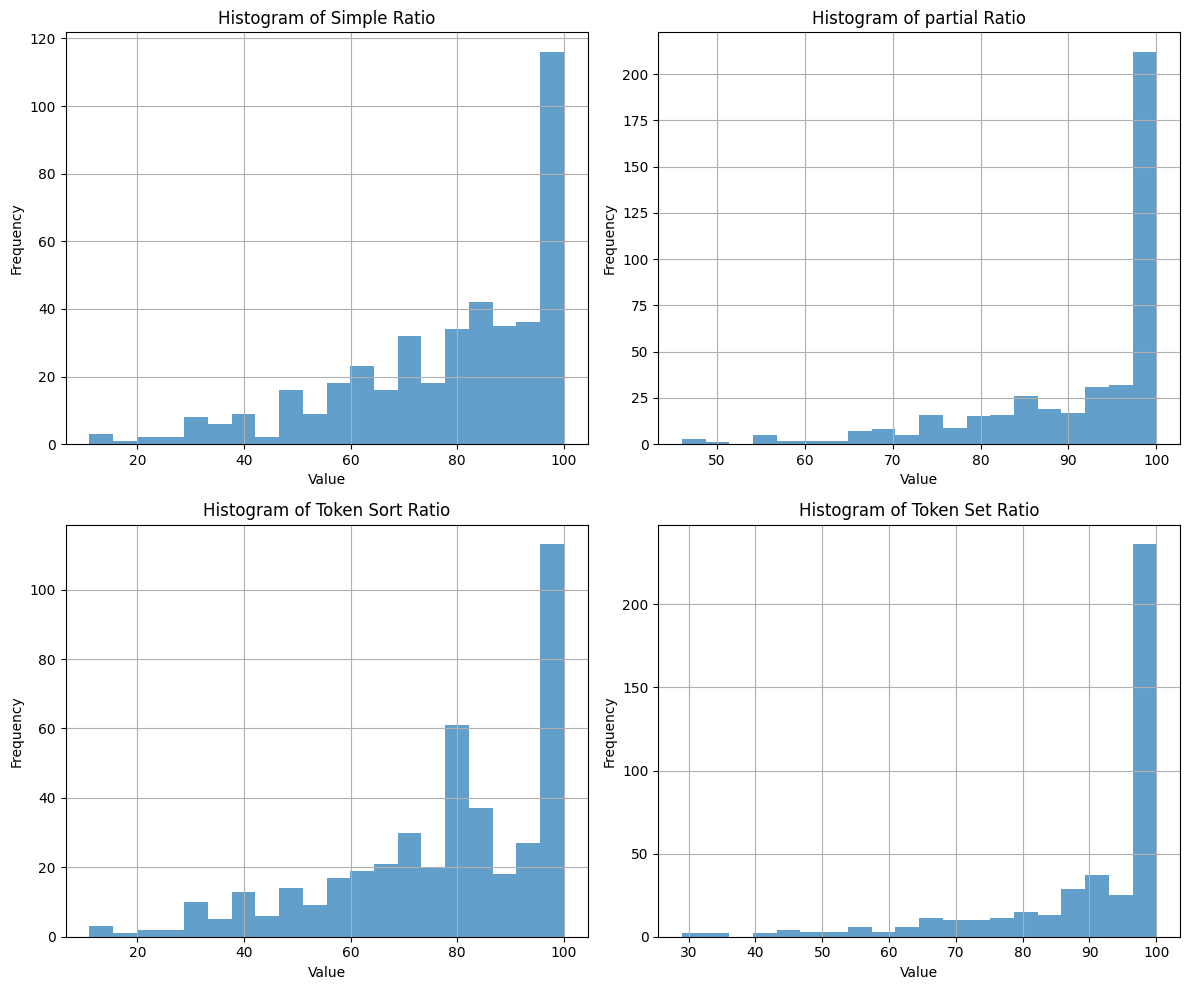

In [7]:
# visualizations of individual attributes
import matplotlib.pyplot as plt

# Assuming 'Simple Ratio', 'Partial Ratio', 'Token Sort Ratio', 'Token Set Ratio' are the columns of interest
ratio_columns = ['Simple Ratio', 'partial Ratio', 'Token Sort Ratio', 'Token Set Ratio']

# Create separate histogram plots for each ratio column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(ratio_columns):
    axes[i].hist(df[column], bins=20, alpha=0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

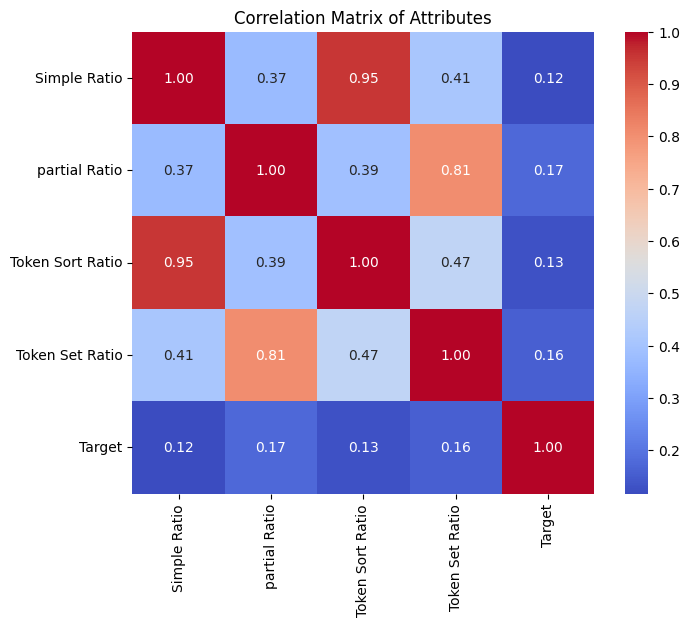

In [8]:
# Plot of Correlations Between Attributes from the Dataset.
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Simple Ratio', 'Partial Ratio', 'Token Sort Ratio', 'Token Set Ratio' are the columns of interest
ratio_columns = ['Simple Ratio', 'partial Ratio', 'Token Sort Ratio', 'Token Set Ratio','Target']

# Create a DataFrame with only the ratio columns
ratio_df = df[ratio_columns]

# Calculate the correlation matrix
correlation_matrix = ratio_df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Attributes')
plt.show()

### Validation of Dataset: 
#### good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [9]:
df.columns

Index(['Company Name', 'Similar Name', 'Target', 'Simple Ratio',
       'partial Ratio', 'Token Sort Ratio', 'Token Set Ratio'],
      dtype='object')

In [10]:
# Apply label encoding to 'Company Name' and 'Similar Name' columns
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df['Company Name'] = label_encoder.fit_transform(df['Company Name'])
# df['Similar Name'] = label_encoder.fit_transform(df['Similar Name'])

In [11]:
# for training model, we need to split the dataframe and also its features
from sklearn.model_selection import train_test_split
# Separate features and target variable
features = [ 'Simple Ratio', 'partial Ratio', 'Token Sort Ratio', 'Token Set Ratio']
xn = df[features] #independent features (input columns)
yn = df['Target'] #dependent feature (output column)

Xn_train, Xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size=0.2, random_state=42)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train SVM model  # linear: means try to capture linear relationship and draws linear hyperplane for classification of data
svm_model = SVC(kernel='linear')  # You can try different kernels: 'linear', 'rbf', etc.
svm_model.fit(Xn_train, yn_train)

# Make predictions
yn_pred = svm_model.predict(Xn_test)

# Evaluate the model
accuracy = accuracy_score(yn_test, yn_pred)
report = classification_report(yn_test, yn_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.5930232558139535
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.74      0.65        43
           1       0.63      0.44      0.52        43

    accuracy                           0.59        86
   macro avg       0.60      0.59      0.58        86
weighted avg       0.60      0.59      0.58        86



In [13]:
# 'rbf': flexibility in capturing nonlinear relationships between data
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(Xn_train, yn_train)

yn_pred_rbf = svm_model_rbf.predict(Xn_test)

accuracy_rbf = accuracy_score(yn_test, yn_pred_rbf)
report_rbf = classification_report(yn_test, yn_pred_rbf)
print(f"Accuracy (RBF Kernel): {accuracy_rbf}")
print("Classification Report (RBF Kernel):\n", report_rbf)

Accuracy (RBF Kernel): 0.627906976744186
Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       0.61      0.72      0.66        43
           1       0.66      0.53      0.59        43

    accuracy                           0.63        86
   macro avg       0.63      0.63      0.62        86
weighted avg       0.63      0.63      0.62        86



In [14]:
# Another nonlinear kernel option is the polynomial kernel. It captures polynomial relationships between features
svm_model_poly = SVC(kernel='poly')
svm_model_poly.fit(Xn_train, yn_train)

yn_pred_poly = svm_model_poly.predict(Xn_test)

accuracy_poly = accuracy_score(yn_test, yn_pred_poly)
report_poly = classification_report(yn_test, yn_pred_poly)
print(f"Accuracy (Poly Kernel): {accuracy_poly}")
print("Classification Report (Poly Kernel):\n", report_poly)

Accuracy (Poly Kernel): 0.6162790697674418
Classification Report (Poly Kernel):
               precision    recall  f1-score   support

           0       0.60      0.70      0.65        43
           1       0.64      0.53      0.58        43

    accuracy                           0.62        86
   macro avg       0.62      0.62      0.61        86
weighted avg       0.62      0.62      0.61        86



In [15]:
# Customizing Kernel Parameters: For both RBF and polynomial kernels, there are additional parameters you can tune, such as gamma for RBF
# Example with RBF kernel and customized gamma value = 0.01
svm_model_rbf_custom = SVC(kernel='rbf', gamma=0.01)  # Try different gamma values, we got 0.01 as best gamma value
svm_model_rbf_custom.fit(Xn_train, yn_train)

yn_pred_rbf_custom = svm_model_rbf_custom.predict(Xn_test)

accuracy_rbf_custom = accuracy_score(yn_test, yn_pred_rbf_custom)
report_rbf_custom = classification_report(yn_test, yn_pred_rbf_custom)
print(f"Accuracy (RBF Kernel - Customized Gamma): {accuracy_rbf_custom}")
print("Classification Report (RBF Kernel - Customized Gamma):\n", report_rbf_custom)


Accuracy (RBF Kernel - Customized Gamma): 0.6627906976744186
Classification Report (RBF Kernel - Customized Gamma):
               precision    recall  f1-score   support

           0       0.61      0.91      0.73        43
           1       0.82      0.42      0.55        43

    accuracy                           0.66        86
   macro avg       0.71      0.66      0.64        86
weighted avg       0.71      0.66      0.64        86



##### Read for Understanding Theory : 
Trying different kernels in Support Vector Machines (SVMs) involves using various mathematical functions to transform input data into a higher-dimensional space, aiming to find the optimal decision boundary for classification tasks.
1. Radial Basis Function (RBF) Kernel:
RBF kernel is often effective and commonly used due to its flexibility in capturing nonlinear relationships. Try using it instead of the linear kernel and evaluate its impact on accuracy.
2. Polynomial Kernel:
Another nonlinear kernel option is the polynomial kernel. It captures polynomial relationships between features. You can try this kernel as well.
3. Customizing Kernel Parameters:
For both RBF and polynomial kernels, there are additional parameters you can tune, such as gamma for RBF or degree for polynomial kernels. Trying different values for these parameters might further improve accuracy.
Decreasing Gamma, Increasing Accuracy: In your case, decreasing the gamma value led to an increase in accuracy. This behavior often signifies that the previous gamma value might have caused the model to overfit the training data, impacting its performance on unseen or test data. Lower gamma values tend to generalize better to unseen data, hence improving accuracy.

### Try out trained model on New record

In [16]:
import pandas as pd
from fuzzywuzzy import fuzz

# give 'Company Name' and 'Similar Name' as input => we will find all the fuzzy ratios => this dataframe of ratios passed to a trained SVM model => get the target ouptut
# Sample function to create a single record DataFrame with similarity ratios
def create_single_record(company_name, similar_name):
    data = {
        # 'Company Name': [company_name],
        # 'Similar Name': [similar_name],
        'Simple Ratio': [fuzz.ratio(company_name, similar_name)],
        'partial Ratio': [fuzz.partial_ratio(company_name, similar_name)],
        'Token Sort Ratio': [fuzz.token_sort_ratio(company_name, similar_name)],
        'Token Set Ratio': [fuzz.token_set_ratio(company_name, similar_name)]
    }

    single_record_df = pd.DataFrame(data)
    return single_record_df

# Usage example:
single_record = create_single_record('HARRIS COUNTY CSCD', 'HARRIS COUNTY')
single_record


,Simple Ratio,partial Ratio,Token Sort Ratio,Token Set Ratio
0,84,100,84,100


In [17]:
# Make predictions on the single_record DataFrame directly without encoding
predicted_target = svm_model_rbf_custom.predict(single_record)

# Print the predicted target
print("Predicted Target:", predicted_target)

# Convert the predictions to match your specified output format
if predicted_target == 0:
    print("Predicted Target: No Match")
elif predicted_target == 1:
    print("Predicted Target: Matched")
else:
    print("Unexpected Prediction Value")

Predicted Target: [1]
Predicted Target: Matched
